In [1]:
#Upload data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('disney_princess_popularity_dataset_300_rows.csv')

#Descriptive statistics
print(df.shape)
print(df.columns)
df.head()


(300, 36)
Index(['PrincessName', 'FirstMovieTitle', 'FirstMovieYear',
       'MovieRuntimeMinutes', 'NumberOfSongs', 'HasSoloSong', 'HasDuet',
       'HairColor', 'EyeColor', 'OutfitPrimaryColor', 'OutfitStyleEra',
       'IsRoyalByBirth', 'HasAnimalSidekick', 'SidekickType',
       'HasMagicalPowers', 'MagicType', 'MainSetting', 'IsBasedOnRealStory',
       'CulturalOrigin', 'SpeaksToAnimals', 'FightsVillainDirectly',
       'RomanticSubplot', 'MarriedByEnd', 'VillainName', 'VillainType',
       'IMDB_Rating', 'RottenTomatoesScore', 'BoxOfficeMillions',
       'AvgScreenTimeMinutes', 'NumMerchItemsOnAmazon',
       'GoogleSearchIndex2024', 'InstagramFanPages',
       'TikTokHashtagViewsMillions', 'Top3Hashtags', 'IsIconic',
       'PopularityScore'],
      dtype='object')


,PrincessName,FirstMovieTitle,FirstMovieYear,MovieRuntimeMinutes,NumberOfSongs,HasSoloSong,HasDuet,HairColor,EyeColor,OutfitPrimaryColor,...,RottenTomatoesScore,BoxOfficeMillions,AvgScreenTimeMinutes,NumMerchItemsOnAmazon,GoogleSearchIndex2024,InstagramFanPages,TikTokHashtagViewsMillions,Top3Hashtags,IsIconic,PopularityScore
0,Pocahontas,Pocahontas's Adventure,1977,85,4,No,Yes,Brown,Green,Pink,...,88,661,25,2524,68,298,481,#TeamPocahontas #LovePocahontas #PocahontasFor...,Yes,88
1,Mulan,Mulan's Adventure,1995,85,1,Yes,Yes,Blonde,Brown,Purple,...,91,688,52,4202,49,133,619,#TeamMulan #LoveMulan #MulanForever,Yes,78
2,Raya,Raya's Adventure,1989,110,4,No,No,Blonde,Hazel,Pink,...,76,790,54,525,68,129,230,#TeamRaya #LoveRaya #RayaForever,No,53
3,Anna,Anna's Adventure,1940,78,1,No,No,Brown,Grey,Green,...,70,820,42,1951,73,138,697,#TeamAnna #LoveAnna #AnnaForever,Yes,84
4,Mulan,Mulan's Adventure,1943,103,7,No,Yes,White,Brown,Green,...,86,996,55,3958,34,155,200,#TeamMulan #LoveMulan #MulanForever,Yes,71


In [9]:
#Checking N/A and duplicates
print("\nMissing values in each column:")
print(df.isnull().sum())

print("\nNumber of duplicate rows:", df.duplicated().sum())

print("\nData types:")
print(df.dtypes)

print("\nQuick describe of numeric features:")
print(df.describe())

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())



Missing values in each column:
PrincessName                   0
FirstMovieTitle                0
FirstMovieYear                 0
MovieRuntimeMinutes            0
NumberOfSongs                  0
HasSoloSong                    0
HasDuet                        0
HairColor                      0
EyeColor                       0
OutfitPrimaryColor             0
OutfitStyleEra                 0
IsRoyalByBirth                 0
HasAnimalSidekick              0
SidekickType                  70
HasMagicalPowers               0
MagicType                     53
MainSetting                    0
IsBasedOnRealStory             0
CulturalOrigin                 0
SpeaksToAnimals                0
FightsVillainDirectly          0
RomanticSubplot                0
MarriedByEnd                   0
VillainName                    0
VillainType                   47
IMDB_Rating                    0
RottenTomatoesScore            0
BoxOfficeMillions              0
AvgScreenTimeMinutes           0
NumMerchIte

In [11]:
#Changing N/A for "None"
df['SidekickType'] = df['SidekickType'].fillna('None')
df['MagicType'] = df['MagicType'].fillna('None')
df['VillainType'] = df['VillainType'].fillna('None')

print("Missing values after:")
print(df[['SidekickType', 'MagicType', 'VillainType']].isnull().sum())


Missing values after:
SidekickType    0
MagicType       0
VillainType     0
dtype: int64


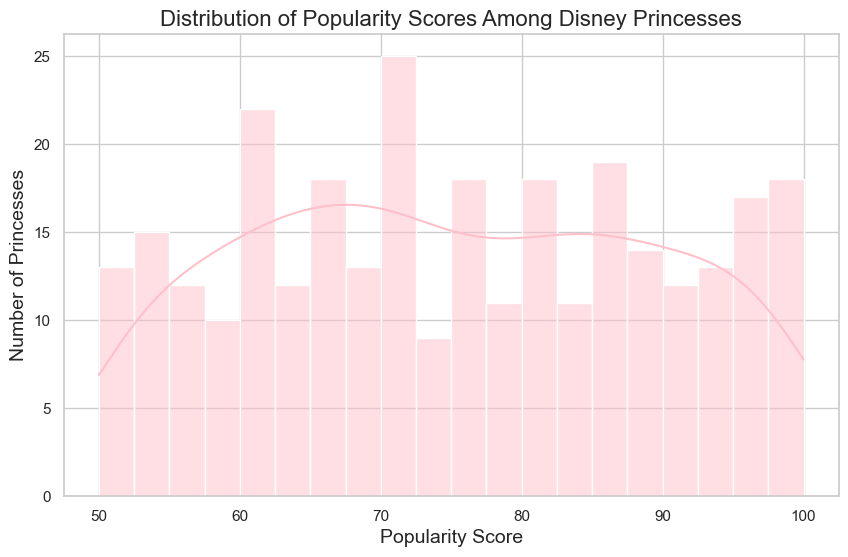

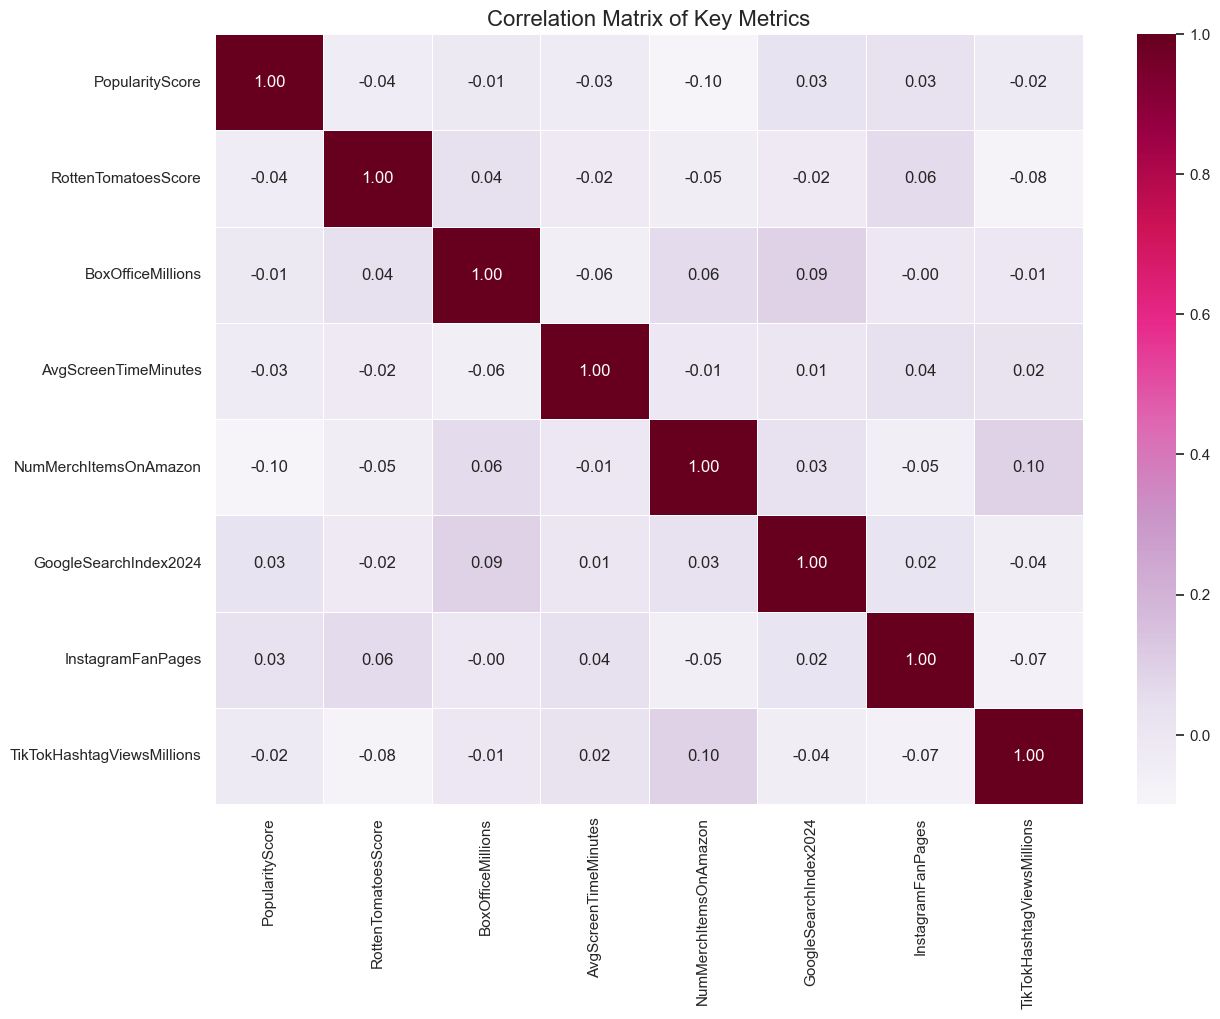

In [12]:
# Checking distribution of popularity
import matplotlib.pyplot as plt
import seaborn as sns

# Styles
sns.set(style="whitegrid", palette="pastel")

# 1. Histogram of PopularityScore
plt.figure(figsize=(10,6))
sns.histplot(df['PopularityScore'], kde=True, color='pink', bins=20)
plt.title('Distribution of Popularity Scores Among Disney Princesses', fontsize=16)
plt.xlabel('Popularity Score', fontsize=14)
plt.ylabel('Number of Princesses', fontsize=14)
plt.show()

# 2. Correlation matrix
plt.figure(figsize=(14,10))
corr = df[['PopularityScore', 'RottenTomatoesScore', 'BoxOfficeMillions', 
           'AvgScreenTimeMinutes', 'NumMerchItemsOnAmazon', 'GoogleSearchIndex2024', 
           'InstagramFanPages', 'TikTokHashtagViewsMillions']].corr()

sns.heatmap(corr, annot=True, cmap='PuRd', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Key Metrics', fontsize=16)
plt.show()



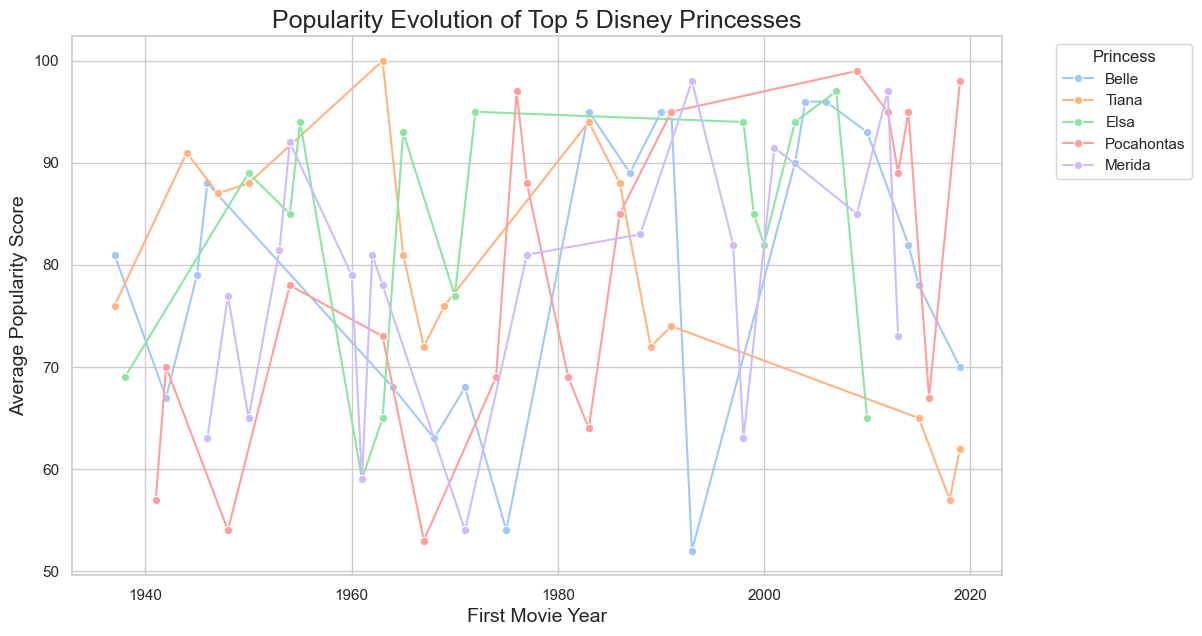

In [13]:
#Popularity Evolution of Top-5
popularity_trend = df.groupby(['FirstMovieYear', 'PrincessName'])['PopularityScore'].mean().reset_index()

top_princesses = df.groupby('PrincessName')['PopularityScore'].mean().sort_values(ascending=False).head(5).index

popularity_trend_top = popularity_trend[popularity_trend['PrincessName'].isin(top_princesses)]

plt.figure(figsize=(12,7))
sns.lineplot(data=popularity_trend_top, x='FirstMovieYear', y='PopularityScore', hue='PrincessName', marker='o', palette='pastel')

plt.title('Popularity Evolution of Top 5 Disney Princesses', fontsize=18)
plt.xlabel('First Movie Year', fontsize=14)
plt.ylabel('Average Popularity Score', fontsize=14)
plt.legend(title='Princess', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


/var/folders/_q/gpzxm6q14vz_lsv0vzj04j240000gn/T/ipykernel_6209/2954991896.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=haircolor_popularity.values, y=haircolor_popularity.index, palette='pastel')


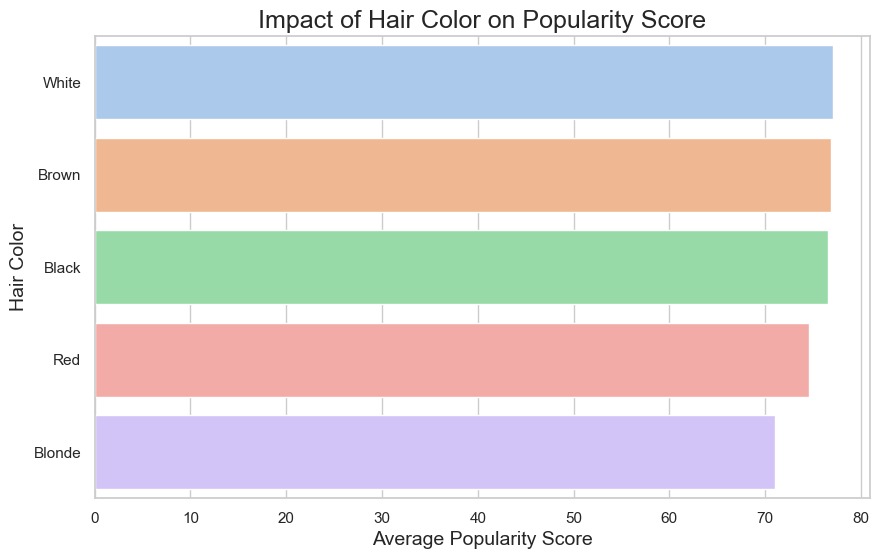

In [14]:
# Popularity by Haircolor
haircolor_popularity = df.groupby('HairColor')['PopularityScore'].mean().sort_values(ascending=False)

# Creating plot
plt.figure(figsize=(10,6))
sns.barplot(x=haircolor_popularity.values, y=haircolor_popularity.index, palette='pastel')

plt.title('Impact of Hair Color on Popularity Score', fontsize=18)
plt.xlabel('Average Popularity Score', fontsize=14)
plt.ylabel('Hair Color', fontsize=14)
plt.show()


In [7]:
# Top-5 TikTok Views
top_tiktok = df[['PrincessName', 'TikTokHashtagViewsMillions']].sort_values(by='TikTokHashtagViewsMillions', ascending=False).head(5)

print(top_tiktok)


    PrincessName  TikTokHashtagViewsMillions
243        Ariel                         999
238   Cinderella                         994
108        Tiana                         988
7       Rapunzel                         988
222         Elsa                         987


In [24]:
import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel")


/var/folders/_q/gpzxm6q14vz_lsv0vzj04j240000gn/T/ipykernel_6209/3354729828.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_tiktok, x='TikTokHashtagViewsMillions', y='PrincessName', palette='pastel')


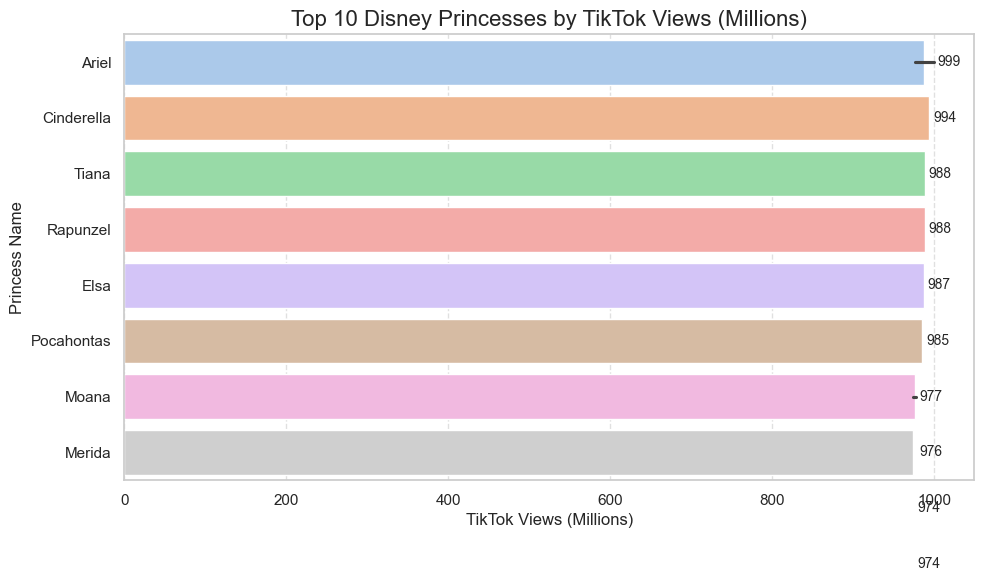

In [31]:
#Top-10 in Tik Tok
top_tiktok = df[['PrincessName', 'TikTokHashtagViewsMillions']].sort_values(by='TikTokHashtagViewsMillions', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_tiktok, x='TikTokHashtagViewsMillions', y='PrincessName', palette='pastel')
plt.title('Top 10 Disney Princesses by TikTok Views (Millions)', fontsize=16)
plt.xlabel('TikTok Views (Millions)')
plt.ylabel('Princess Name')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

for index, value in enumerate(top_tiktok['TikTokHashtagViewsMillions']):
    plt.text(value + 5, index, f'{value:.0f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()


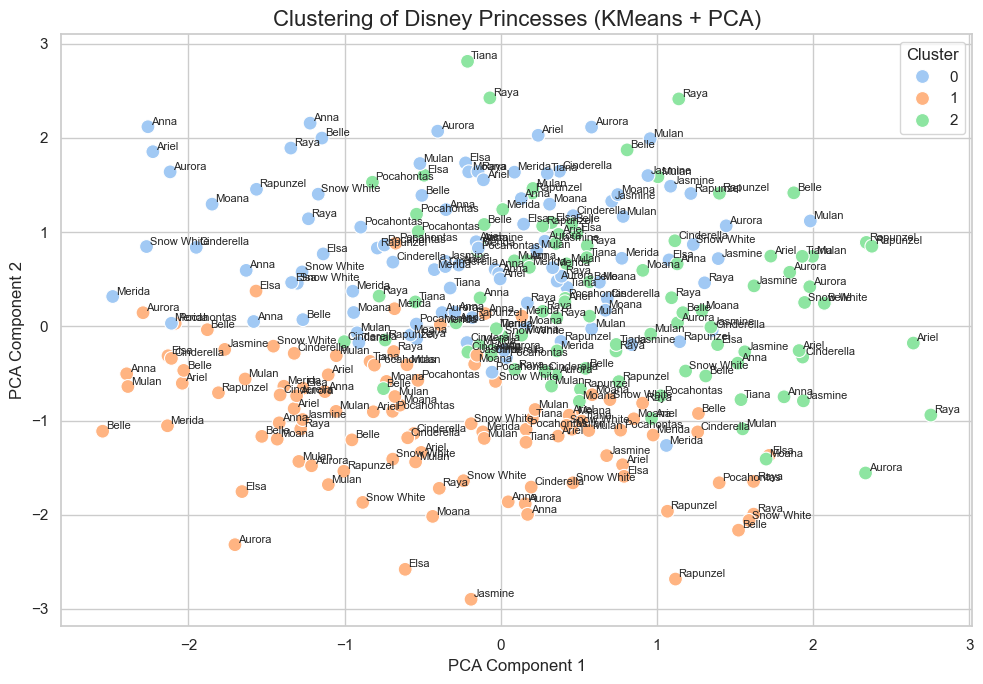

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Variables for Clusters
features = ['BoxOfficeMillions', 'NumberOfSongs', 'AvgScreenTimeMinutes',
            'NumMerchItemsOnAmazon', 'GoogleSearchIndex2024', 
            'InstagramFanPages', 'TikTokHashtagViewsMillions', 'PopularityScore']

X = df[features].copy()

# 2. Standartisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Number of Clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
df['Cluster'] = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# 5. Visual
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='pastel', s=100)

for i in range(df.shape[0]):
    plt.text(x=df['PCA1'][i]+0.02, y=df['PCA2'][i]+0.02, s=df['PrincessName'][i], fontsize=8)

plt.title('Clustering of Disney Princesses (KMeans + PCA)', fontsize=16)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


In [17]:
# Средние значения по каждому кластеру
cluster_summary = df.groupby('Cluster')[features].mean().round(1)
display(cluster_summary)


,BoxOfficeMillions,NumberOfSongs,AvgScreenTimeMinutes,NumMerchItemsOnAmazon,GoogleSearchIndex2024,InstagramFanPages,TikTokHashtagViewsMillions,PopularityScore
Cluster,,,,,,,,
0,839.2,4.4,42.3,2537.7,73.5,225.2,422.8,74.1
1,398.8,3.6,43.6,2204.9,46.2,152.4,514.4,76.1
2,888.6,4.0,35.6,2681.6,65.2,76.3,585.4,75.2


In [20]:
cluster_labels = {
    0: "👑 Classic Legends",
    1: "💡 Modern All-Stars",
    2: "📱 Social Media Powerhouses"
}

df['ClusterLabel'] = df['Cluster'].map(cluster_labels)

df.to_csv('disney_princess_clustered.csv', index=False)
print("✅ Exported cleaned and clustered data to 'data/disney_princess_clustered.csv'")


✅ Exported cleaned and clustered data to 'data/disney_princess_clustered.csv'


In [34]:
# Grouping by Name
princess_avg = df.groupby(['PrincessName', 'ClusterLabel'], as_index=False).mean(numeric_only=True)


/var/folders/_q/gpzxm6q14vz_lsv0vzj04j240000gn/T/ipykernel_6209/3685797126.py:41: UserWarning: Glyph 128081 (\N{CROWN}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/_q/gpzxm6q14vz_lsv0vzj04j240000gn/T/ipykernel_6209/3685797126.py:41: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/_q/gpzxm6q14vz_lsv0vzj04j240000gn/T/ipykernel_6209/3685797126.py:41: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/_q/gpzxm6q14vz_lsv0vzj04j240000gn/T/ipykernel_6209/3685797126.py:42: UserWarning: Glyph 128081 (\N{CROWN}) missing from font(s) Arial.
  plt.savefig('radar_princess_clusters.png', dpi=300)
/var/folders/_q/gpzxm6q14vz_lsv0vzj04j240000gn/T/ipykernel_6209/3685797126.py:42: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) Arial.
  plt.savefig('radar_princess_clusters.png', dpi=300)
/var/folders/_q/gpzxm6q14vz_lsv0vzj04j240000gn/T/ipyke

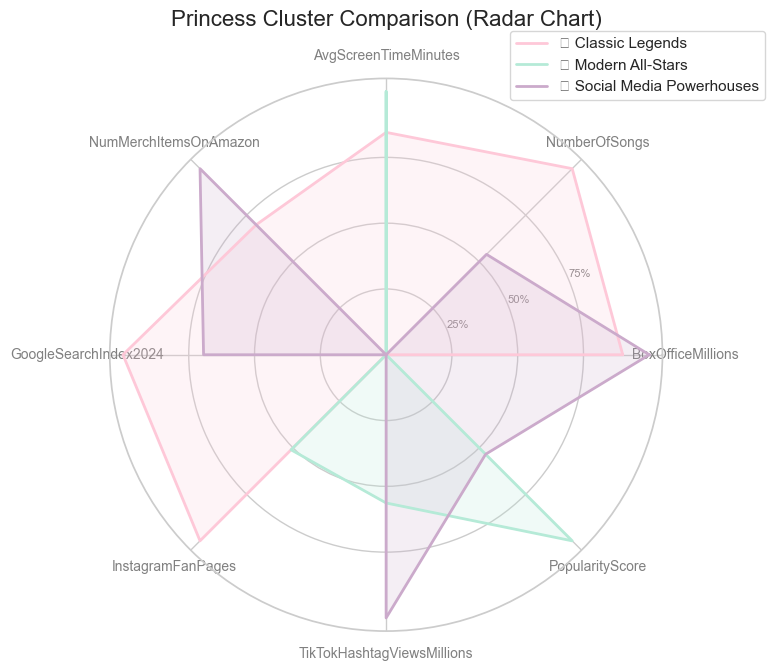

In [27]:
# Creating star-diagram (radar)
metrics = ['BoxOfficeMillions', 'NumberOfSongs', 'AvgScreenTimeMinutes',
           'NumMerchItemsOnAmazon', 'GoogleSearchIndex2024',
           'InstagramFanPages', 'TikTokHashtagViewsMillions', 'PopularityScore']

# Normalizing data (0–1)
cluster_avg_norm = cluster_avg.copy()
for col in metrics:
    min_val = cluster_avg[col].min()
    max_val = cluster_avg[col].max()
    cluster_avg_norm[col] = (cluster_avg[col] - min_val) / (max_val - min_val)

labels = np.array(metrics)
num_vars = len(labels)

# Angles of axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # circle

# Names
names = cluster_avg['ClusterLabel'].values
colors = ['#FEC8D8', '#B5EAD7', '#CBAACB']

plt.figure(figsize=(8, 8))

for idx, row in cluster_avg_norm.iterrows():
    values = row[metrics].tolist()
    values += values[:1]  # замыкаем круг
    plt.polar(angles, values, label=names[idx], linewidth=2, linestyle='solid', color=colors[idx])
    plt.fill(angles, values, alpha=0.2, color=colors[idx])

# Visual
plt.title("Princess Cluster Comparison (Radar Chart)", size=16, y=1.08)
plt.xticks(angles[:-1], labels, color='gray', size=10)
plt.yticks([0.25, 0.5, 0.75], ["25%", "50%", "75%"], color="gray", size=8)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.savefig('radar_princess_clusters.png', dpi=300)
plt.show()


In [33]:
df['PrincessName'].value_counts().head(10)


PrincessName
Mulan         29
Raya          23
Anna          23
Moana         22
Cinderella    21
Merida        21
Belle         20
Ariel         20
Pocahontas    19
Snow White    18
Name: count, dtype: int64

In [35]:
# PCA for grouped lines
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['BoxOfficeMillions', 'NumberOfSongs', 'AvgScreenTimeMinutes',
            'NumMerchItemsOnAmazon', 'GoogleSearchIndex2024',
            'InstagramFanPages', 'TikTokHashtagViewsMillions', 'PopularityScore']

X = princess_avg[features]
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

princess_avg['PCA1'] = X_pca[:, 0]
princess_avg['PCA2'] = X_pca[:, 1]


/var/folders/_q/gpzxm6q14vz_lsv0vzj04j240000gn/T/ipykernel_6209/85334767.py:23: UserWarning: Glyph 128081 (\N{CROWN}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/_q/gpzxm6q14vz_lsv0vzj04j240000gn/T/ipykernel_6209/85334767.py:23: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/_q/gpzxm6q14vz_lsv0vzj04j240000gn/T/ipykernel_6209/85334767.py:23: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) Arial.
  plt.tight_layout()
/Users/mariamaslova/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128081 (\N{CROWN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mariamaslova/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mariamaslova/Library/Python/3.9/lib/python/site-p

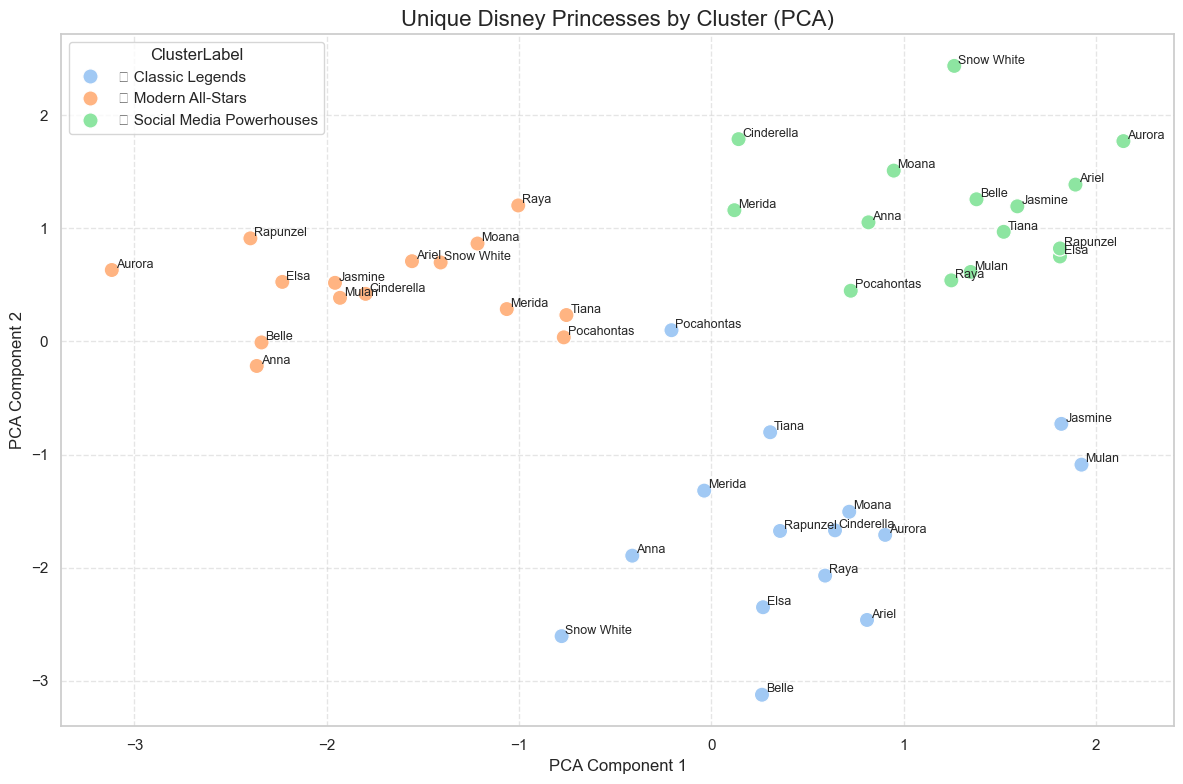

In [37]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=princess_avg,
    x='PCA1',
    y='PCA2',
    hue='ClusterLabel',
    palette='pastel',
    s=120
)

for i in range(princess_avg.shape[0]):
    plt.text(
        princess_avg['PCA1'][i] + 0.02,
        princess_avg['PCA2'][i] + 0.02,
        princess_avg['PrincessName'][i],
        fontsize=9
    )

plt.title('Unique Disney Princesses by Cluster (PCA)', fontsize=16)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


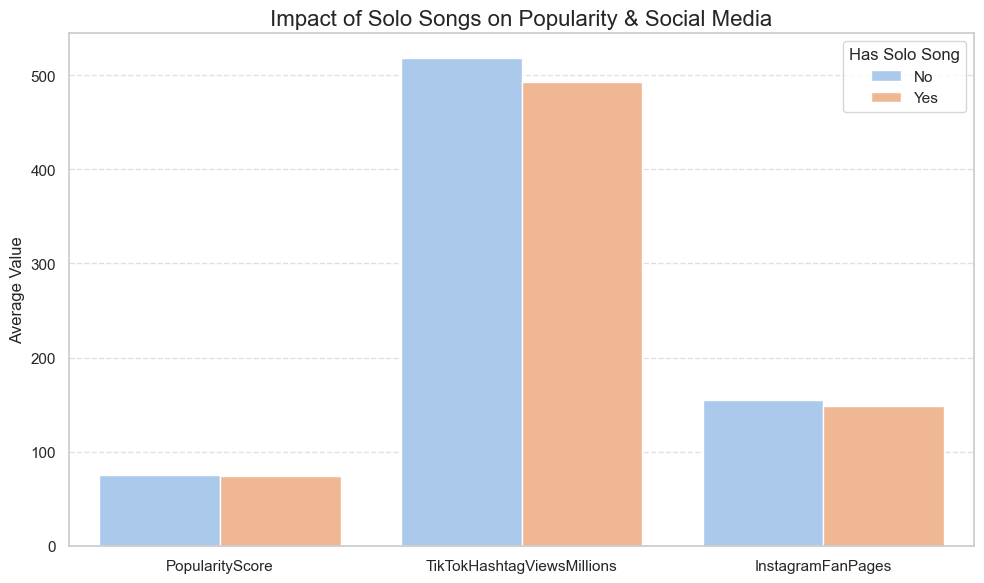

In [38]:
df['HasSoloSong'] = df['HasSoloSong'].fillna('No')

solo_comparison = df.groupby('HasSoloSong')[['PopularityScore', 'TikTokHashtagViewsMillions', 'InstagramFanPages']].mean().reset_index()

melted = solo_comparison.melt(id_vars='HasSoloSong', var_name='Metric', value_name='AverageValue')

plt.figure(figsize=(10,6))
sns.barplot(data=melted, x='Metric', y='AverageValue', hue='HasSoloSong', palette='pastel')

plt.title('Impact of Solo Songs on Popularity & Social Media', fontsize=16)
plt.ylabel('Average Value')
plt.xlabel('')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Has Solo Song')
plt.tight_layout()
plt.show()
